<a href="https://colab.research.google.com/github/hoodini/photomaker/blob/main/Realistic_PhotoMaker_Modified_for_Google_Colab_by_Yuval_Avidani_hackit_co_il.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PhotoMaker modified to run on Colab by Yuval Avidani @hackit.co.il  https://linktree.com/hackit.co.il   
# The modification was not an easy job. Please appreciate the hard work by buying me a beer:
# https://www.buymeacoffee.com/hackit.co.il

## How to use:
**NOTE: Make sure you have GPU active! This can be seen under Runtime -> Change Runtime Type -> that you run on GPU (T4 / T4 with High-Ram / V100 / A100). THE NOTEBOOK WILL MOST LIKELY TO CRASH IF NOT USING AT LEAST V100! **  
  
1. Run STEP 1 (Installation)  
2. Create a folder inside the 'examples' folder and upload as many images you like. The image should show the face in most of its area!  
Then, specify the complete folder path by clicking on the folder -> copy path -> and pasting it as the value of the 'input_folder_name' variable (e.g: input_folder_name = '/content/PhotoMaker/examples/newton_man')  
3. STEP 3 - Type in your prompt and click run. That's it!  

# STEP 1 - Installation

In [1]:
!git clone https://github.com/TencentARC/PhotoMaker.git
%cd PhotoMaker/
!pip install torch==2.0.1 torchvision==0.15.2 diffusers==0.25.0 transformers==4.36.2 huggingface-hub==0.20.2 spaces==0.19.4 numpy accelerate safetensors omegaconf peft gradio

import torch
print(torch.__version__)
print(torch.version.cuda)

# Clear CUDA cache
torch.cuda.empty_cache()

import torch
import numpy as np
import random
import os
from PIL import Image

from diffusers.utils import load_image
from diffusers import EulerDiscreteScheduler
from huggingface_hub import hf_hub_download

from photomaker.pipeline import PhotoMakerStableDiffusionXLPipeline

# gloal variable and function
def image_grid(imgs, rows, cols, size_after_resize):
    # Calculate the actual number of rows needed
    actual_rows = len(imgs) // cols
    if len(imgs) % cols != 0:
        actual_rows += 1

    w, h = size_after_resize, size_after_resize
    grid = Image.new('RGB', size=(cols*w, actual_rows*h))

    for i, img in enumerate(imgs):
        img = img.resize((w,h))
        grid.paste(img, box=(i%cols*w, i//cols*h))

    return grid

# Download the PhotoMaker model
photomaker_path = hf_hub_download(
    repo_id="TencentARC/PhotoMaker",
    filename="photomaker-v1.bin",
    repo_type="model"
)

base_model_path = 'SG161222/RealVisXL_V3.0'
device = "cuda"
save_path = "./outputs"

# Load base model
pipe = PhotoMakerStableDiffusionXLPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.bfloat16,
    use_safetensors=True,
    variant="fp16"
).to(device)

# Load PhotoMaker checkpoint
pipe.load_photomaker_adapter(
    os.path.dirname(photomaker_path),
    subfolder="",
    weight_name=os.path.basename(photomaker_path),
    trigger_word="img"
)


pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)
pipe.fuse_lora()

# Load base model
pipe = PhotoMakerStableDiffusionXLPipeline.from_pretrained(
    base_model_path,
    torch_dtype=torch.bfloat16,
    use_safetensors=True,
    variant="fp16"
).to(device)

# Load PhotoMaker checkpoint
pipe.load_photomaker_adapter(
    os.path.dirname(photomaker_path),
    subfolder="",
    weight_name=os.path.basename(photomaker_path),
    trigger_word="img"
)

# Configure the scheduler
pipe.scheduler = EulerDiscreteScheduler.from_config(pipe.scheduler.config)

# Fuse LoRA layers
pipe.fuse_lora()

Cloning into 'PhotoMaker'...
remote: Enumerating objects: 64, done.
remote: Counting objects: 100% (64/64), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 64 (delta 12), reused 37 (delta 2), pack-reused 0
Receiving objects: 100% (64/64), 7.13 MiB | 19.99 MiB/s, done.
Resolving deltas: 100% (12/12), done.
/content/PhotoMaker
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 619.9/619.9 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.0/6.0 MB 106.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 97.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 51.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 270.9/270.9 kB 33.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 168.3/168.3 kB 24.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.6/16.6 MB 91.9 MB/s eta 0:00:00
    

2.0.1+cu117
11.7


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


photomaker-v1.bin:   0%|          | 0.00/934M [00:00<?, ?B/s]

model_index.json:   0%|          | 0.00/577 [00:00<?, ?B/s]

Fetching 18 files:   0%|          | 0/18 [00:00<?, ?it/s]

text_encoder/config.json:   0%|          | 0.00/560 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/737 [00:00<?, ?B/s]

text_encoder_2/config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/474 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/1.39G [00:00<?, ?B/s]

model.fp16.safetensors:   0%|          | 0.00/246M [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer_2/special_tokens_map.json:   0%|          | 0.00/460 [00:00<?, ?B/s]

tokenizer_2/tokenizer_config.json:   0%|          | 0.00/725 [00:00<?, ?B/s]

tokenizer_2/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/1.68k [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/602 [00:00<?, ?B/s]

tokenizer_2/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/5.14G [00:00<?, ?B/s]

diffusion_pytorch_model.fp16.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading PhotoMaker components [1] id_encoder from [/root/.cache/huggingface/hub/models--TencentARC--PhotoMaker/snapshots/3602d02ba7cc99ce8886e24063ed10e4f2510c84]...
Loading PhotoMaker components [2] lora_weights from [/root/.cache/huggingface/hub/models--TencentARC--PhotoMaker/snapshots/3602d02ba7cc99ce8886e24063ed10e4f2510c84]


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

Loading PhotoMaker components [1] id_encoder from [/root/.cache/huggingface/hub/models--TencentARC--PhotoMaker/snapshots/3602d02ba7cc99ce8886e24063ed10e4f2510c84]...
Loading PhotoMaker components [2] lora_weights from [/root/.cache/huggingface/hub/models--TencentARC--PhotoMaker/snapshots/3602d02ba7cc99ce8886e24063ed10e4f2510c84]


# STEP 2 - create a folder, upload your images, specify the path

Input ID images:


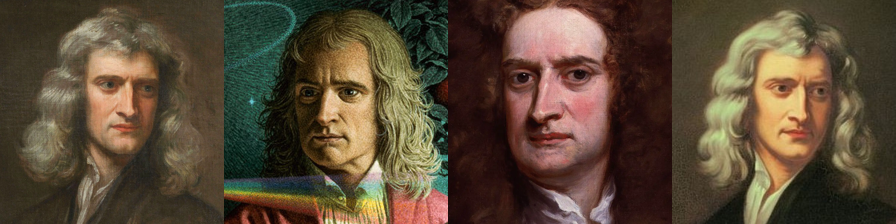

In [2]:
# define and show the input ID images
input_folder_name = '/content/PhotoMaker/examples/newton_man'
image_basename_list = os.listdir(input_folder_name)
image_path_list = sorted([os.path.join(input_folder_name, basename) for basename in image_basename_list])

input_id_images = []
for image_path in image_path_list:
    input_id_images.append(load_image(image_path))

input_grid = image_grid(input_id_images, 1, 4, size_after_resize=224)
print("Input ID images:")
input_grid

# STEP 3 - Generate AI Images

In [3]:
## Note that the trigger word `img` must follow the class word for personalization
prompt = "sci-fi, closeup portrait photo of a man img wearing the sunglasses in Iron man suit, face, slim body, high quality, film grain"
negative_prompt = "(asymmetry, worst quality, low quality, illustration, 3d, 2d, painting, cartoons, sketch), open mouth"
generator = torch.Generator(device=device).manual_seed(42)
num_images_per_prompt=1

## Parameter setting
num_steps = 50
style_strength_ratio = 20
start_merge_step = int(float(style_strength_ratio) / 100 * num_steps)
if start_merge_step > 30:
    start_merge_step = 30

# Generate images
images = pipe(
    prompt=prompt,
    input_id_images=input_id_images,
    negative_prompt=negative_prompt,
    num_images_per_prompt=num_images_per_prompt,
    num_inference_steps=num_steps,
    start_merge_step=start_merge_step,
    generator=generator,
).images

# Show and save the results
## Downsample for visualization
grid = image_grid(images, 1, 4, size_after_resize=512)

os.makedirs(save_path, exist_ok=True)
for idx, image in enumerate(images):
    image.save(os.path.join(save_path, f"photomaker_{idx:02d}.png"))

print("Results:")
grid

  0%|          | 0/50 [00:00<?, ?it/s]

OutOfMemoryError: CUDA out of memory. Tried to allocate 4.50 GiB (GPU 0; 14.75 GiB total capacity; 8.74 GiB already allocated; 3.35 GiB free; 11.27 GiB reserved in total by PyTorch) If reserved memory is >> allocated memory try setting max_split_size_mb to avoid fragmentation.  See documentation for Memory Management and PYTORCH_CUDA_ALLOC_CONF